### Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [2]:
import os

path = os.listdir('./Data/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = './Data/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [7]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

### Visualize data

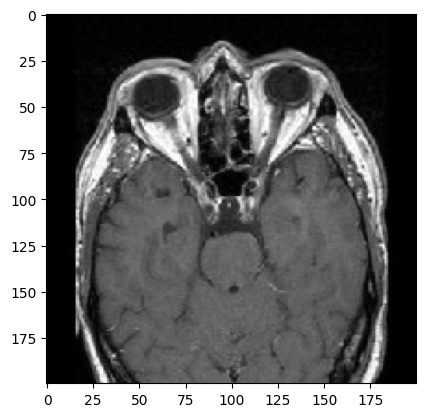

In [8]:
plt.imshow(X[0], cmap='gray')
# plt.imshow(X[1], cmap='gray')

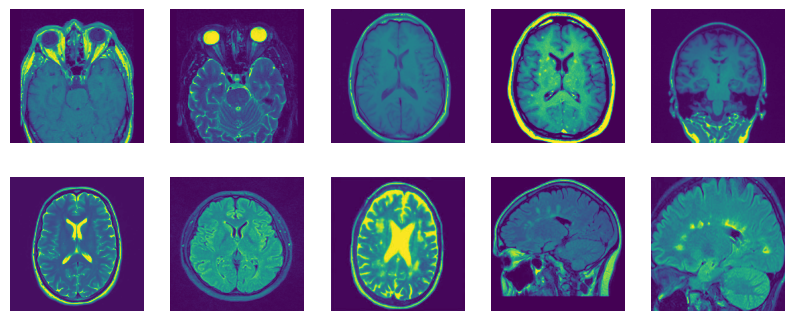

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

# Plot each image on a subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i])
    ax.axis('off')

# Display the plot
plt.show()

### Prepare data

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

### Split Data

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [12]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

### Feature Scaling

In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [14]:
from sklearn.decomposition import PCA

In [17]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)


(977, 40000) (245, 40000)


### Train Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [60]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


In [61]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation with k=5
scores = cross_val_score(lg, xtrain, ytrain, cv=5)

# Print the average accuracy score and the standard deviation of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.03)


In [62]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [20]:
# Perform k-fold cross-validation with k=5
scores_svm = cross_val_score(sv, xtrain, ytrain, cv=5)

# Print the average accuracy score and the standard deviation of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

Accuracy: 0.96 (+/- 0.02)


### Evaluation

In [38]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [20]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


In [49]:
from sklearn.metrics import f1_score, precision_score,recall_score,accuracy_score,confusion_matrix

In [50]:
pred_lg = lg.predict(xtest)

In [51]:
lg_confusionmatrix = confusion_matrix(ytest,pred_lg)
print("Confusion Matrix: ")
print(lg_confusionmatrix)

Confusion Matrix: 
[[ 73   8]
 [  2 162]]


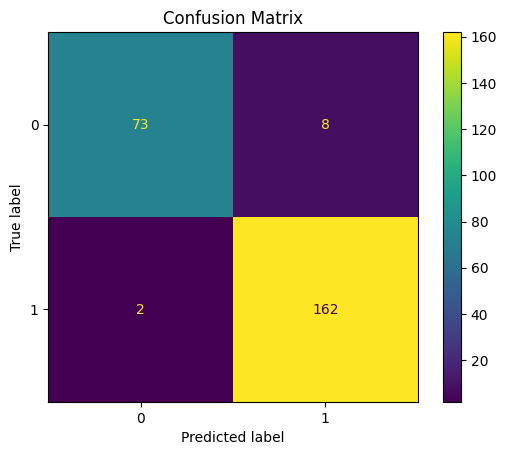

In [52]:
disp = ConfusionMatrixDisplay(confusion_matrix=lg_confusionmatrix, display_labels=lg.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [53]:
lg_accuracy = accuracy_score(ytest,pred_lg)
lg_f1 = f1_score(ytest,pred_lg)
lg_precision = precision_score(ytest,pred_lg)
lg_recall = recall_score(ytest,pred_lg)

print("LG accuracy: ", lg_accuracy)
print("LG f1 score: ", lg_f1)
print("LG precision: ", lg_precision)
print("LG recall: ", lg_recall)



LG accuracy:  0.9591836734693877
LG f1 score:  0.9700598802395209
LG precision:  0.9529411764705882
LG recall:  0.9878048780487805


### Prediction

In [54]:
pred = sv.predict(xtest)


In [55]:
svm_confusionmatrix = confusion_matrix(ytest,pred)
print("Confusion matrix: ")
print(svm_confusionmatrix)

Confusion matrix: 
[[ 75   6]
 [  3 161]]


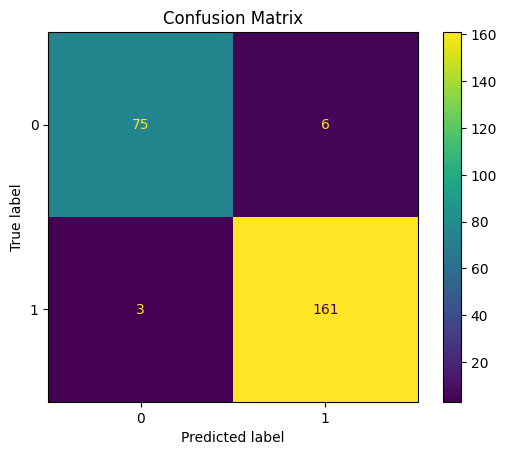

In [56]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_confusionmatrix, display_labels=lg.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [29]:
svm_accuracy = accuracy_score(ytest,pred)
svm_f1 = f1_score(ytest, pred)
svm_precision = precision_score(ytest, pred)
svm_recall = recall_score(ytest,pred)

print("SVM accuracy: ", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Precision:", svm_precision)
print("SVM recall:", svm_recall)

SVM accuracy:  0.963265306122449
SVM F1-score: 0.9728096676737159
SVM Precision: 0.9640718562874252
SVM recall: 0.9817073170731707


In [30]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [31]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  9
0 1


### TEST MODEL

In [32]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

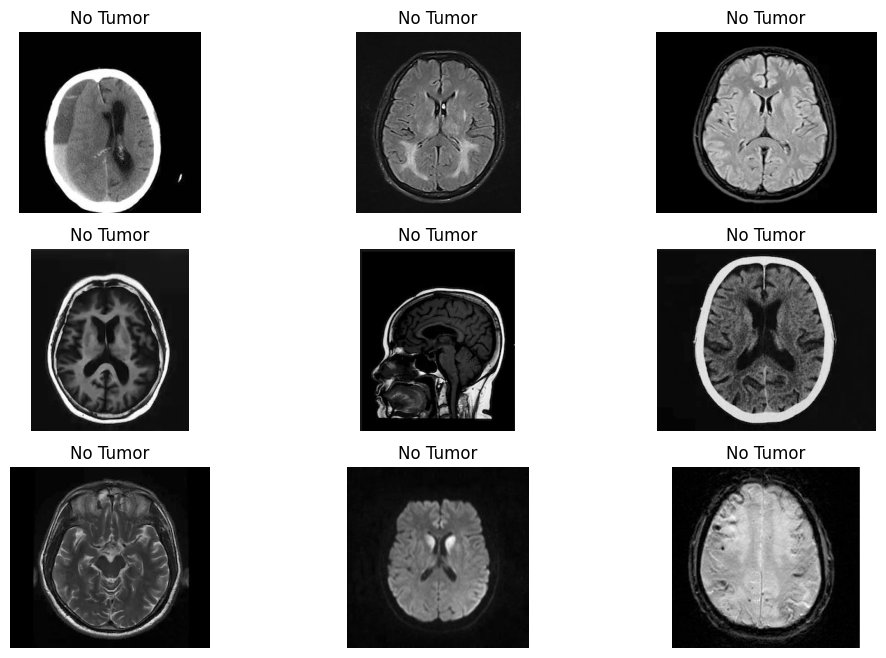

In [33]:
plt.figure(figsize=(12,8))
p = os.listdir('./Data/Testing/')
c=1
for i in os.listdir('./Data/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('./Data/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

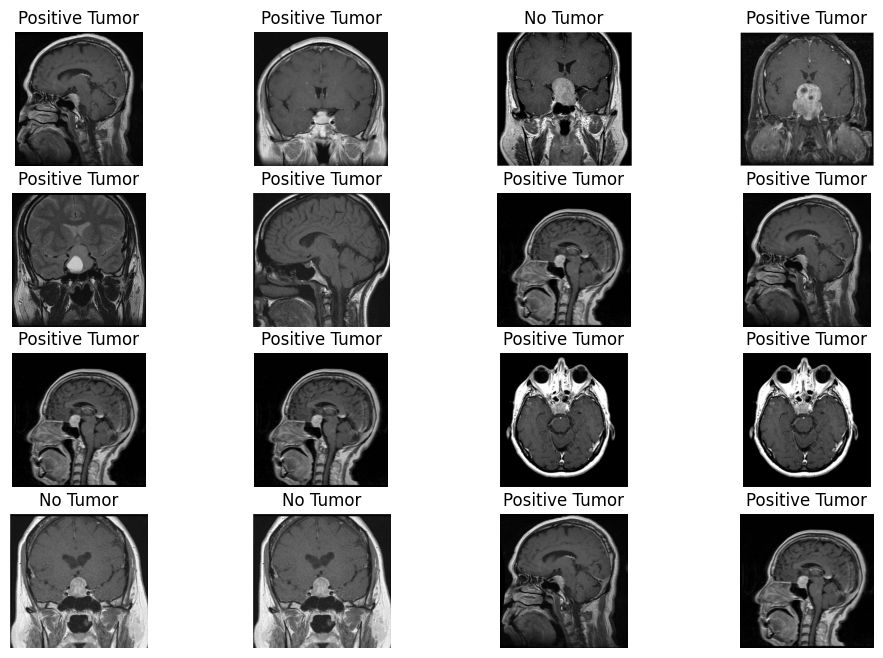

In [34]:
plt.figure(figsize=(12,8))
p = os.listdir('./Data/Testing/')
c=1
for i in os.listdir('./Data/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('./Data/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1